# EDA On Netflix And Tv Show Dataset

In [1]:
#Import the import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
df = pd.read_csv("c:/users/sakshi yadav/Downloads/netflix_titles.csv/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Analysis the Dataset 
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#Cleaning the data
#Filling missing values:
df['director'] = df['director'].fillna("Unkown")
df['cast'] = df['cast'].fillna("Unkown")
df['country'] = df['country'].fillna("Unkown")
df['rating'] = df['rating'].fillna("Unkown")

In [11]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [12]:
#Convert data-added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [13]:
missing_dates = df['date_added'].isna()

In [14]:
df.loc[missing_dates, 'date_added'] = pd.to_datetime(df.loc[missing_dates, 'release_year'].astype(str) + '-01-01')

In [15]:
df['date_added'].isnull().sum()

np.int64(0)

In [16]:
df['duration'].isnull().sum()

np.int64(3)

In [17]:
df.loc[(df['duration'].isna()) & (df['type'] == 'Movie'), 'duration'] = '0 min'
df.loc[(df['duration'].isna()) & (df['type'] == 'TV Show'), 'duration'] = '1 Season'

In [18]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

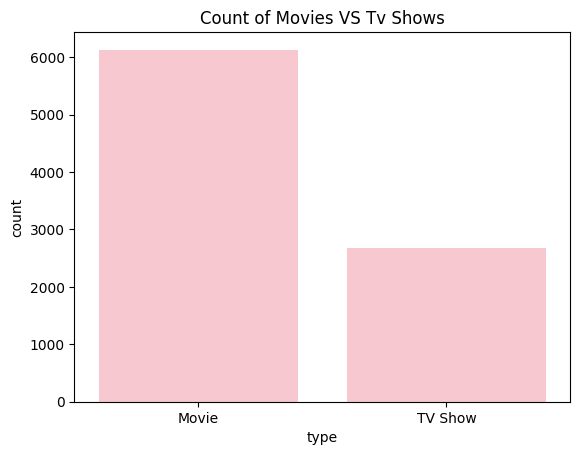

In [19]:
#Data Analysis & Visulization
#Movies VS Tv Shows
sns.countplot(x='type', data=df, color='pink')
plt.title("Count of Movies VS Tv Shows")
plt.show()

In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

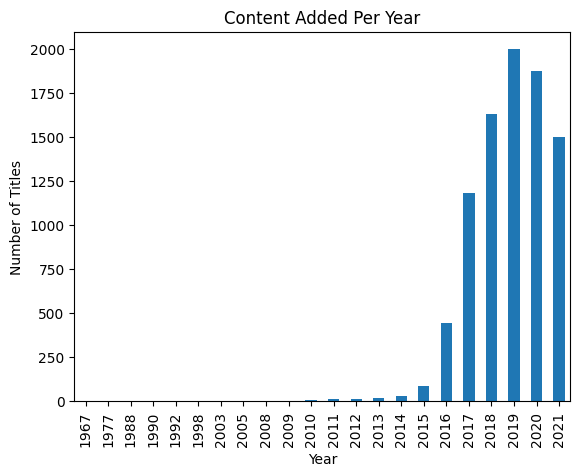

In [21]:
#Content added per year 
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

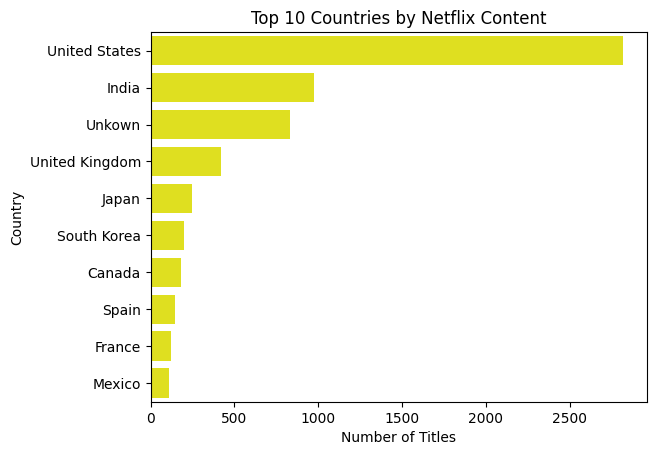

In [22]:
#Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, color='yellow')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

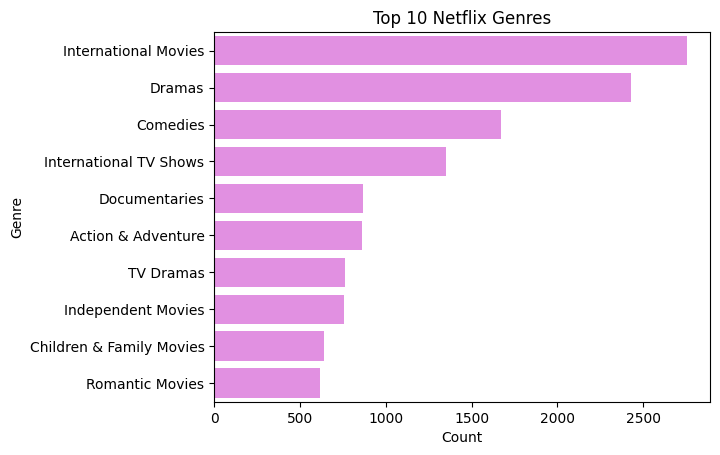

In [23]:
#Most Frequent Genres
from collections import Counter

# Split the 'listed_in' column
genres = df['listed_in'].str.split(', ')
all_genres = sum(genres, [])  # Flatten the list
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

sns.barplot(data=genre_df, y='Genre', x='Count', color='violet')
plt.title('Top 10 Netflix Genres')
plt.show()

In [24]:
#Filter by Country (e.g., India)
india_df = df[df['country'].str.contains('India', na=False)]
india_df['type'].value_counts()

type
Movie      962
TV Show     84
Name: count, dtype: int64

# Mini Project Completed!!!!